# Práctica 6, primera parte (reglas asociativas)
Esta parte de la práctica consiste en analizar el problema [Groceries](https://www.kaggle.com/datasets/alexmiles/grocery-products-purchase-data). Se emplean reglas de asociación, en un problema de análisis de transacciones.

Se desea analizar este conjunto de datos mediante reglas de asociación. Se le proporciona,
como ejemplo, un gráfico no interactivo, construido mediante mlxtend y networkx.

Emplee alguno de los restantes paquetes vistos en clase de teoría para generar una visualización de mejor calidad y para responder a las siguientes cuestiones:
1. ¿Cuáles son las asociaciones más relevantes entre estos productos? Pruebe con diferentes combinaciones de confianza, soporte y lift
2. Visualice un grafo con las reglas más relevantes (en el grafo deben mostrarse más de 10 reglas y menos de 100)
3. (Opcional) Dé un ejemplo de cómo usaría esta información para decidir un producto en el que realizar un descuento y un producto asociado a este anterior al que se le pueda elevar el precio y compensar el margen comercial perdido en el descuento.

In [103]:
%matplotlib ipympl
import seaborn as sns
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import ipywidgets as widgets

In [104]:
data = pd.read_csv('Grocery Products Purchase.csv')

# selección de las primeras tres columnas
data = data.iloc[:, 0:8]

# se eliminan las compras que tengan 'nan'
data = data.dropna()

for a in data.columns:
	data[a] = data[a].astype(str)

In [105]:
# Selección de algunas columnas y transformación a formato de transacción
transactions = data.iloc[:, 0:8].values.tolist()

# Transformación con One-Hot Encoding
te = TransactionEncoder()
oht = te.fit(transactions).transform(transactions)
df = pd.DataFrame(oht, columns=te.columns_)


In [106]:
# Minería de ítems frecuentes
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Minería de reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2)


In [111]:
# mostrar las asociaciones más relevantes
display(Markdown('### Reglas de asociación'))
display(rules.sort_values(by=['lift'], ascending=False).head(10))["antecedents","consequents","lift"]

### Reglas de asociación

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(chocolate),(waffles),0.053444,0.047506,0.010689,0.200000,4.210000,0.008150,1.190618,0.805521
11,(waffles),(chocolate),0.047506,0.053444,0.010689,0.225000,4.210000,0.008150,1.221362,0.800499
15,(flour),(sugar),0.050475,0.063539,0.011876,0.235294,3.703134,0.008669,1.224603,0.768762
14,(sugar),(flour),0.063539,0.050475,0.011876,0.186916,3.703134,0.008669,1.167807,0.779486
24,(processed cheese),(white bread),0.046318,0.087292,0.013658,0.294872,3.377987,0.009615,1.294386,0.738156
25,(white bread),(processed cheese),0.087292,0.046318,0.013658,0.156463,3.377987,0.009615,1.130574,0.771294
16,(ham),(processed cheese),0.082542,0.046318,0.011876,0.143885,3.106438,0.008053,1.113964,0.739094
17,(processed cheese),(ham),0.046318,0.082542,0.011876,0.256410,3.106438,0.008053,1.233823,0.711021
4,(misc. beverages),(bottled water),0.030285,0.128266,0.011283,0.372549,2.904503,0.007398,1.389326,0.676185
5,(bottled water),(misc. beverages),0.128266,0.030285,0.011283,0.087963,2.904503,0.007398,1.063241,0.752187


TypeError: 'NoneType' object is not subscriptable

In [108]:
def onclick(event):
    # Obtener el índice del punto más cercano al clic
    idx = event.ind[0]

    # Extraer la regla correspondiente a ese índice
    rule = rules.iloc[idx]
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))

    # Mostrar la regla en el notebook
    display(Markdown(f"**Regla:** {antecedents} -> {consequents}"))
    display(Markdown(f"**Lift:** {rule['lift']:.2f}, **Confianza:** {rule['confidenc

    plt.plot(ts, label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.legend()
plt.show()e']:.2f}"))

/home/mier/.local/lib/python3.8/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


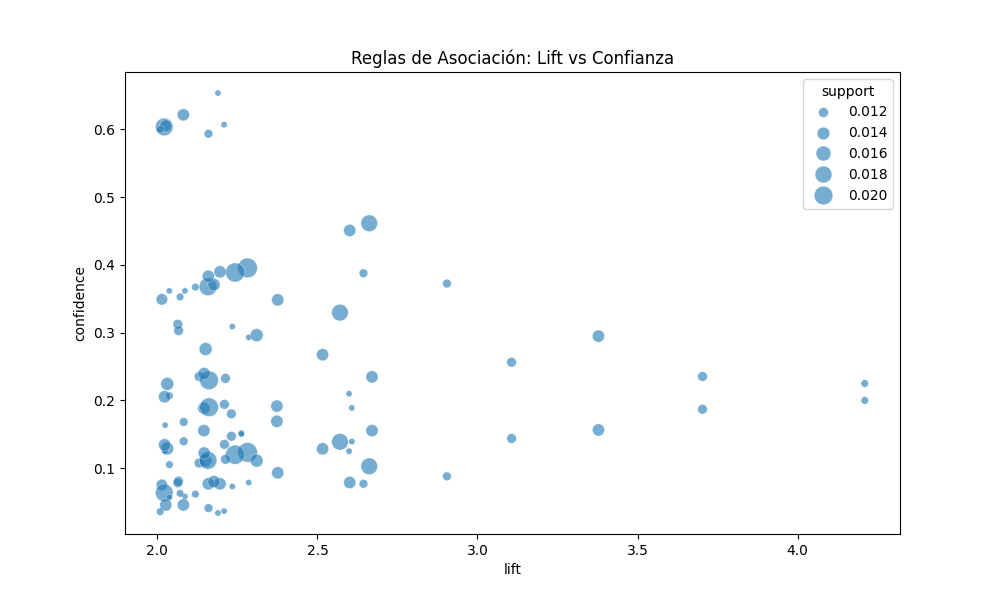

**Regla:** bottled beer -> soda

**Lift:** 2.28, **Confianza:** 0.40

**Regla:** herbs -> whole milk, root vegetables

**Lift:** 2.16, **Confianza:** 0.37

**Regla:** herbs -> whole milk, root vegetables

**Lift:** 2.16, **Confianza:** 0.37

**Regla:** soda, yogurt -> bottled water

**Lift:** 2.31, **Confianza:** 0.30

**Regla:** soda, tropical fruit -> bottled water

**Lift:** 2.29, **Confianza:** 0.29

**Regla:** root vegetables, whole milk, tropical fruit -> other vegetables, citrus fruit

**Lift:** 2.52, **Confianza:** 0.27

**Regla:** other vegetables, citrus fruit -> root vegetables, whole milk, tropical fruit

**Lift:** 2.52, **Confianza:** 0.13

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=rules, x="lift", y="confidence", alpha=0.6, size="support", sizes=(20, 200), ax=ax, picker=4)
plt.title("Reglas de Asociación: Lift vs Confianza")

# Conectar el evento de clic con la función onclick
fig.canvas.mpl_connect('pick_event', onclick)

plt.show()
